We are using R for analysis.


In [ ]:
#packages
library(tseries)
library(forecast)
library(repr)
library(rugarch) # package for GARCH modelling
library(moments) # package for kurtosis estimation
library(aTSA) # package for ARCH-LM test

Installing package into 'C:/Users/fazol/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fazol\AppData\Local\Temp\RtmpS4PqEM\downloaded_packages


Installing package into 'C:/Users/fazol/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'aTSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fazol\AppData\Local\Temp\RtmpS4PqEM\downloaded_packages



Attaching package: 'aTSA'


The following object is masked from 'package:forecast':

    forecast


The following objects are masked from 'package:tseries':

    adf.test, kpss.test, pp.test


The following object is masked from 'package:graphics':

    identify




In [36]:
data <- read.csv("Microsoft_data.csv")
data <- data[-c(1:2), ]

# Rename column 'price' to 'Date'
names(data)[names(data) == "Price"] <- "Date"
names(data)[names(data) == "Adj.Close"] <- "Price"
data <- data[, -c(3:7)]
data$Price <- as.numeric(data$Price)
head(data)

,Date,Price
,<chr>,<dbl>
3,2010-01-04,23.25406
4,2010-01-05,23.26156
5,2010-01-06,23.11880
6,2010-01-07,22.87838
7,2010-01-08,23.03616
8,2010-01-11,22.74315


In [37]:
data$log_ret <- c(NA, diff(log(data$Price)))
data <- na.omit(data)
length(data$log_ret)
# omit NAs
log_ret = na.omit(data$log_ret)
length(data$log_ret)
head(data)

[1] 3313

[1] 3313

,Date,Price,log_ret
,<chr>,<dbl>,<dbl>
4,2010-01-05,23.26156,0.0003227053
5,2010-01-06,23.11880,-0.0061558790
6,2010-01-07,22.87838,-0.0104538339
7,2010-01-08,23.03616,0.0068727811
8,2010-01-11,22.74315,-0.0128014351
9,2010-01-12,22.59287,-0.0066294634


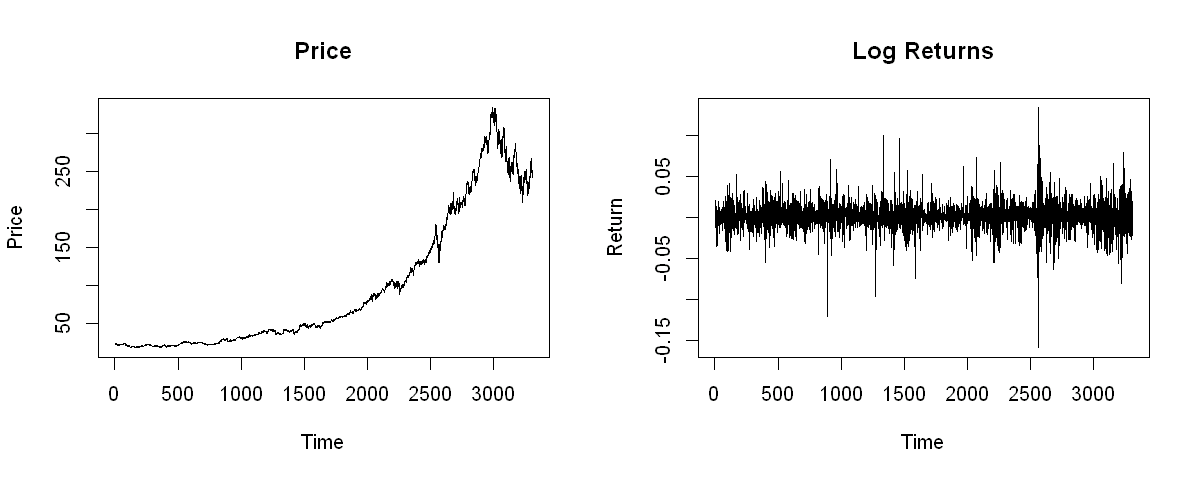

In [48]:
options(repr.plot.width=10, repr.plot.height=4)
par(mfrow = c(1,2))

# Original Price
ts.plot(data$Price, col = "black", main = "Price", ylab = "Price", xlab = "Time")

# Log Returns (if available)
ts.plot(data$log_ret, col = "black", main = "Log Returns", ylab = "Return", xlab = "Time")

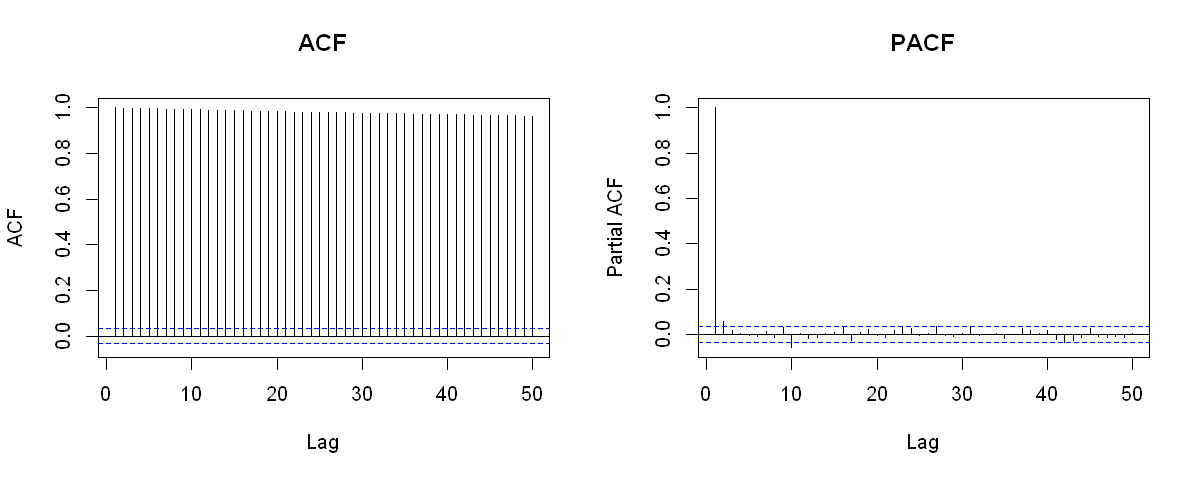

In [49]:
par(mfrow = c(1,2))
Acf(data$Price, lag.max = 50, main = "ACF")
Pacf(data$Price, lag.max = 50, main = "PACF")

We can see that price is not stationary variables

In [50]:
tseries::adf.test(data$Price)


	Augmented Dickey-Fuller Test

data:  data$Price
Dickey-Fuller = -1.7914, Lag order = 14, p-value = 0.6667
alternative hypothesis: stationary


Warning message in tseries::adf.test(data$log_ret):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  data$log_ret
Dickey-Fuller = -15.89, Lag order = 14, p-value = 0.01
alternative hypothesis: stationary


KPSS Unit Root Test 
alternative: nonstationary 
 
Type 1: no drift no trend 
 lag stat p.value
  13 2.89    0.01
----- 
 Type 2: with drift no trend 
 lag  stat p.value
  13 0.195     0.1
----- 
 Type 1: with drift and trend 
 lag  stat p.value
  13 0.107     0.1
----------- 
Note: p.value = 0.01 means p.value <= 0.01 
    : p.value = 0.10 means p.value >= 0.10 


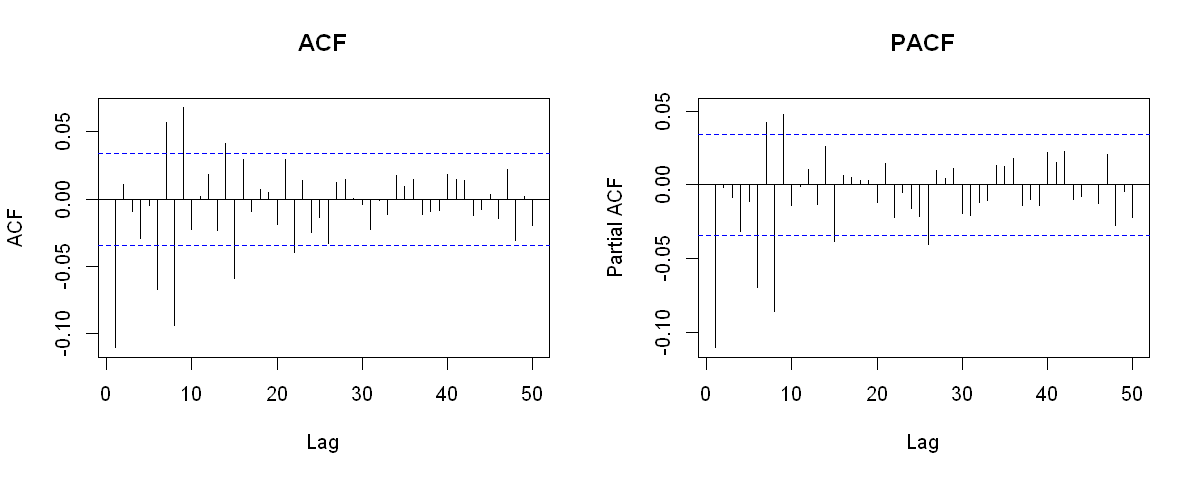

In [51]:
# ACF PACF plots
par(mfrow = c(1,2))
Acf(data$log_ret, lag.max = 50, main = "ACF")
Pacf(data$log_ret, lag.max = 50, main = "PACF")

#ADF test
tseries::adf.test(data$log_ret)

#KPSS test
kpss.test(data$log_ret)

Series: data$log_ret 
ARIMA(0,0,1) with zero mean 

Coefficients:
          ma1
      -0.1073
s.e.   0.0171

sigma^2 = 0.0002673:  log likelihood = 8927.67
AIC=-17851.33   AICc=-17851.33   BIC=-17839.12


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with zero mean
Q* = 59.238, df = 9, p-value = 1.88e-09

Model df: 1.   Total lags used: 10



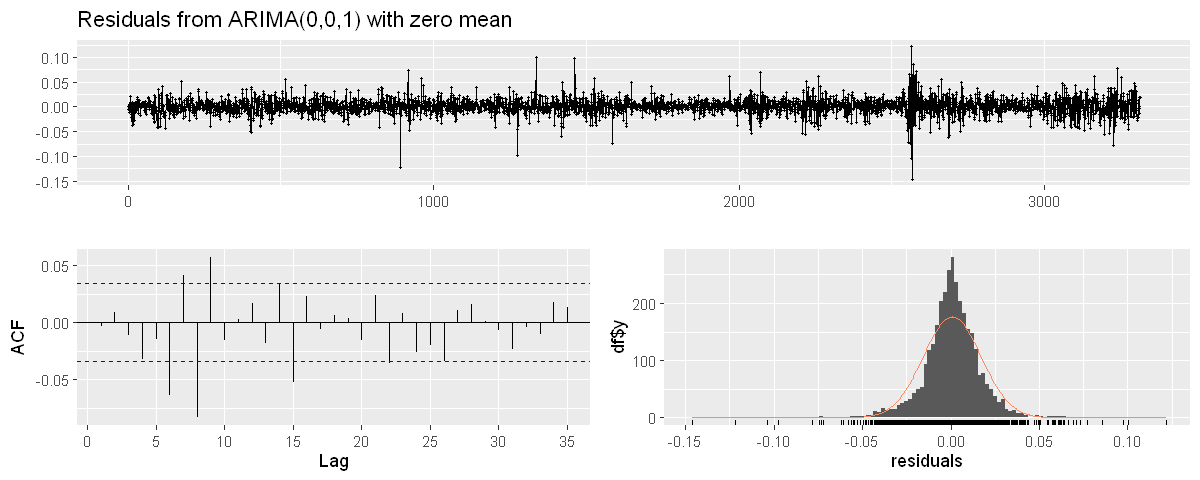

In [52]:
(fit_auto <- auto.arima(data$log_ret, ic = c("bic"), stationary = TRUE))
checkresiduals(fit_auto)

In [53]:
Box.test(fit_auto$residuals, lag = 20, type = c("Ljung-Box"))


	Box-Ljung test

data:  fit_auto$residuals
X-squared = 77.393, df = 20, p-value = 1.083e-08


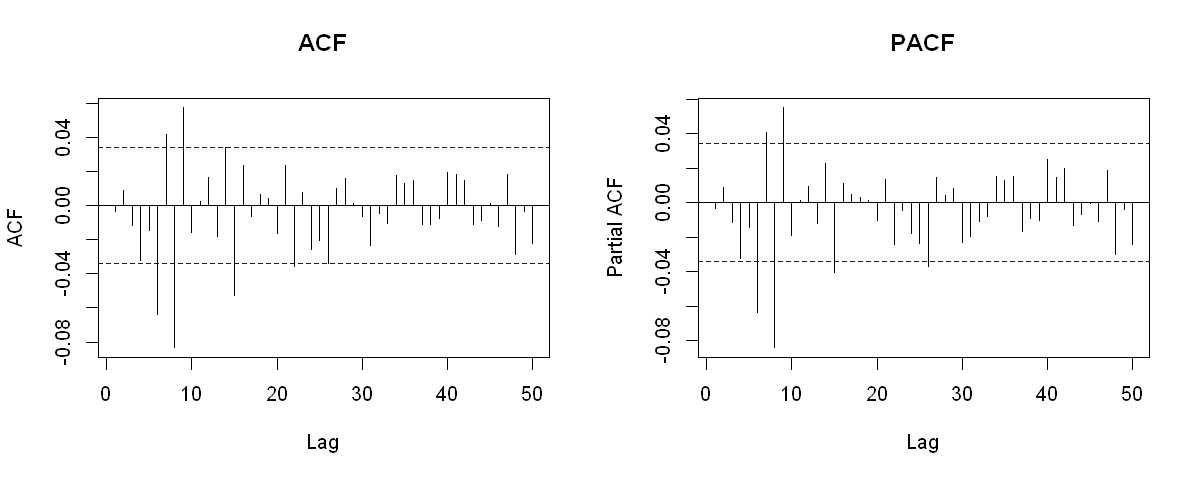

In [54]:
par(mfrow = c(1,2))
Acf(fit_auto$residuals, lag.max = 50, main = "ACF")
Pacf(fit_auto$residuals, lag.max = 50, main = "PACF")